# Propensity data - EDA

# Contents:

I. [Loading the Data:](#Loading-the-Data:)

II. [Univariate Analysis:](#Univariate-Analysis:)


*  [Time range of Data:](#Time-range-of-Data:)

* [Distribution of Category:](#Distribution-of-Category:)

* [Distribution of SubCategory:](#Distribution-of-SubCategory:)

* [Distribution of Action:](#Distribution-of-Action:)

* [Distribution of Quantity:](#Distribution-of-Quantity:)

* [Distribution of Rate:](#Distribution-of-Rate:)

* [Distribution of Total Price:](#Distribution-of-Total-Price:)

    
    
III. [Multivariate Analysis:](#Multivariate-Analysis:)

* [How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?](#How-many-unique-users-in-the-data-and-how-many-of-them-purchased-atleast-once?-Also,-what-is-the-average-number-of-purchase-per-customer?)

* [Which is the most purchased Category/Sub-category?](#Which-is-the-most-purchased-Category/Sub-category?)

* [Do people add the products to cart before they purchase or buy directly?](#Do-people-add-the-products-to-cart-before-they-purchase-or-buy-directly?)

* [What is the average time taken by a user to buy a product?](#What-is-the-average-time-taken-by-a-user-to-buy-a-product?)

* [What is the average time between repeat purchase?](#What-is-the-average-time-between-repeat-purchase?)

* [What is the trend of unique users across time period?](#What-is-the-trend-of-unique-users-across-time-period?)

* [What is the trend of purchase across the time period?](#What-is-the-trend-of-purchase-across-the-time-period?)

---


## Loading the Data:

In [1]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the data and changing the data type of the column "DateTime" from string to datetime format
data = pd.read_excel('data/final_customer_data.xlsx')
data['DateTime'] = pd.to_datetime(data['DateTime'])
print(data.shape)
data.head()

(2090, 9)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


In [3]:
data.sample(10)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
1471,52769802843,xzcxx4-399a-414f-9259,2019-09-12 20:40:00,Toys,Toy car,add_to_cart,NaN,NaN,NaN
396,51633993644,0d091c2-c9c2-4e81-90a5-865,2019-10-17 23:22:00,Accessories,wrist band,product_view,NaN,NaN,NaN
1173,56802499312,964d2227-6106-4b23-b232,2019-07-11 11:43:00,Kitchen Appliances,Kettle,first_app_open,NaN,NaN,NaN
182,51632985791,e056030-e659-4616-8187-fdc,2019-09-10 11:14:00,Digital Devices,Printers,add_to_cart,NaN,NaN,NaN
831,51762528321,1fa547b7-df5f-4342-b7e5,2019-02-11 15:11:00,Gaming Accessories,gaming mouse,first_app_open,NaN,NaN,NaN
531,51517997197,jyhykb7-79b7-4293-57422,2019-10-22 13:14:00,Home Decor,Wall paint,read_reviews,NaN,NaN,NaN
341,51804424828,75fbd0c-e907-4293-9c87-2,2019-10-16 19:17:00,Digital Devices,Kindle eBook,add_to_cart,NaN,NaN,NaN
493,52306036802,95c3b60d-0e9c-45af-ab1e,2019-10-21 21:45:00,Musical Instruments,Flute,first_app_open,NaN,NaN,NaN
1134,52713090310,22bebe3b-8e41-45c3-9eaa,2019-06-11 19:28:00,Bed room,Wardrobes,checkout,NaN,NaN,NaN
29,52028780773,175667-0a8f-4506-9f30,2019-02-10 12:00:00,Accessories,Watches,search,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      2090 non-null   int64         
 1   Session_id   2090 non-null   object        
 2   DateTime     2090 non-null   datetime64[ns]
 3   Category     2090 non-null   object        
 4   SubCategory  2090 non-null   object        
 5   Action       2090 non-null   object        
 6   Quantity     201 non-null    float64       
 7   Rate         201 non-null    float64       
 8   Total Price  201 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


## Univariate Analysis:

#### Time range of Data:

([Contents:](#Contents:))

In [5]:
# Display the minimum date in the dataset
print("Min Date:", data.DateTime.min())

# Display the maximum date in the dataset
print("Max Date:", data.DateTime.max())

# Calculate and display the range duration between the minimum and maximum dates
print("Range:", data.DateTime.max() - data.DateTime.min())


Min Date: 2019-01-01 11:00:00
Max Date: 2019-12-22 17:52:00
Range: 355 days 06:52:00


#### Distribution of Category:

([Contents:](#Contents:))

Total Unique Categories: 105


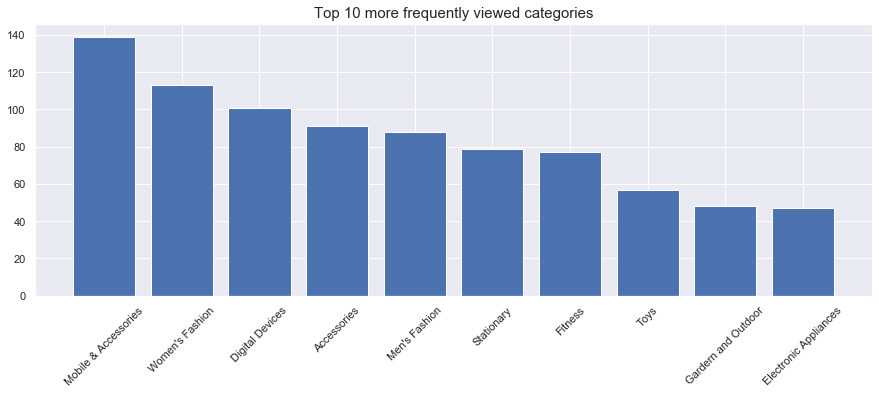

In [6]:
# Count the total number of unique categories
print("Total Unique Categories: " + str(data.Category.nunique()))

# Group data by category, count the sessions, and select the top 10 categories
temp_category = data.groupby('Category')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

# Create a bar chart to display the distribution of the top 10 categories
plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.Session_id)
plt.title("Top 10 more frequently viewed categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()


#### Distribution of SubCategory:

([Contents:](#Contents:))

Total Unique SubCategories: 364


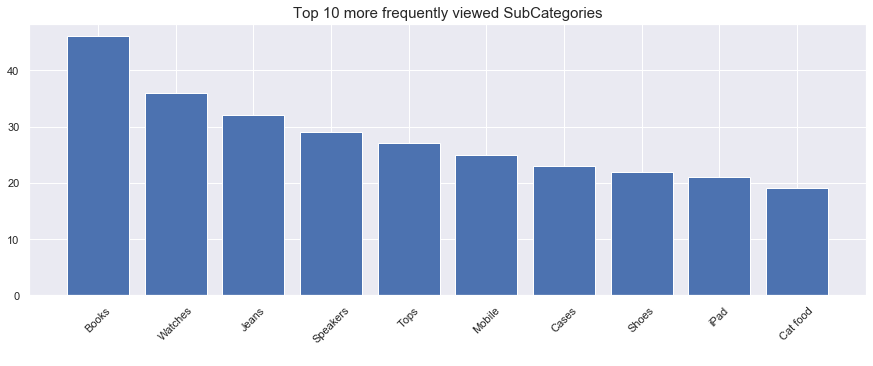

In [7]:
# Display the total number of unique SubCategories
print("Total Unique SubCategories:", data.SubCategory.nunique())

# Group data by SubCategory, count the sessions, and select the top 10 SubCategories
temp_subcategory = data.groupby('SubCategory')['Session_id'].count().sort values(ascending=False).reset_index()[:10]

# Create a bar chart to display the distribution of the top 10 SubCategories
plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.Session_id)
plt.title("Top 10 more frequently viewed SubCategories", size=15)
plt.xticks(rotation=45)
plt.xlabel("SubCategory")
plt.show()


#### Distribution of Action:

([Contents:](#Contents:))

read_reviews           342
search                 320
product_view           292
add_to_cart            280
checkout               202
click_wishlist_page    202
purchase               201
first_app_open         121
add_review              69
add_to_wishlist         33
product_review          22
add_to_wishist           5
read_review              1
Name: Action, dtype: int64

Total Unique Actions: 11


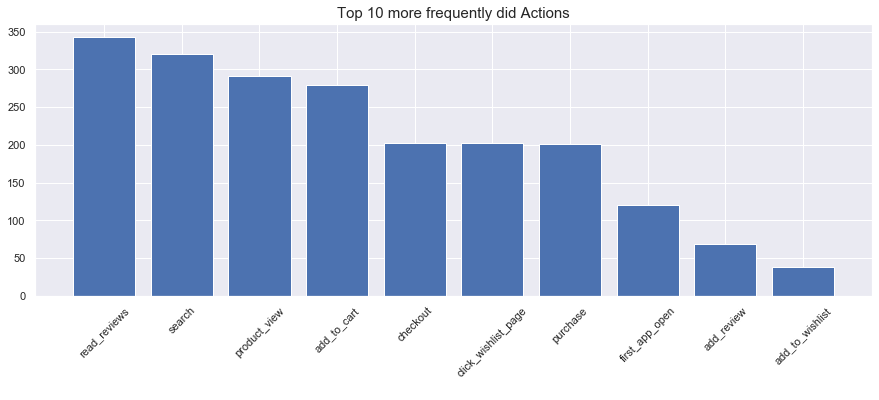

read_reviews           343
search                 320
product_view           292
add_to_cart            280
checkout               202
click_wishlist_page    202
purchase               201
first_app_open         121
add_review              69
add_to_wishlist         38
product_review          22
Name: Action, dtype: int64

In [8]:
# Display the distribution of different actions in the dataset
display(data.Action.value_counts())

# Replace 'read_review' with 'read_reviews' and 'add_to_wishist' with 'add_to_wishlist' in the 'Action' column
data['Action'] = data['Action'].apply(lambda x: 'read_reviews' if x in ('read_review') else x)
data['Action'] = data['Action'].apply(lambda x: 'add_to_wishlist' if x in ('add_to_wishist') else x)

# Display the total number of unique actions after replacing
print("Total Unique Actions:", data.Action.nunique())

# Group data by Action, count the sessions, and select the top 10 actions
temp_actions = data.groupby('Action')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

# Create a bar chart to display the distribution of the top 10 actions
plt.figure(figsize=(15,5))
plt.bar(temp_actions.Action, temp_actions.Session_id)
plt.title("Top 10 more frequently did Actions", size=15)
plt.xticks(rotation=45)
plt.xlabel("Action")
plt.show()

# Display the distribution of actions after the replacements
data.Action.value_counts()


In [9]:
data.head(3)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN


#### Distribution of Quantity:

([Contents:](#Contents:))

Summary stats of Quantity:


,Quantity
count,201.000000
mean,2.965174
std,7.161968
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,100.000000


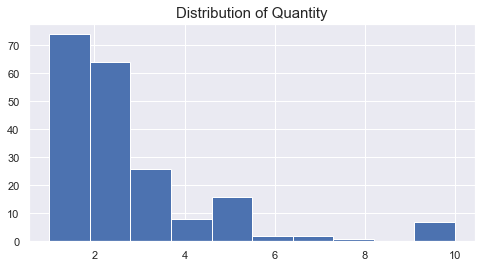

In [10]:
# Display summary statistics of the 'Quantity' column
print("Summary stats of Quantity:")
display(data[['Quantity']].describe())

# Create a histogram to visualize the distribution of 'Quantity' values less than 100
plt.figure(figsize=(8,4))
plt.hist(data[data['Quantity']<100]['Quantity'], density=False)
plt.title("Distribution of Quantity", size=15)
plt.show()


It is evident from the summary stats that the "Quantity" column has an outlier (the value 100, occured only once in the dataset). 

#### Distribution of Rate:

([Contents:](#Contents:))

Summary stats of Rate:


,Rate
count,201.000000
mean,7133.283582
std,14778.150668
min,10.000000
25%,500.000000
50%,1200.000000
75%,6000.000000
max,90000.000000


Total records less than or equal to 75% cut: 154
Total records greater than 75% cut: 47


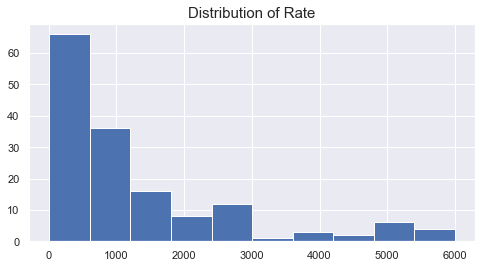

In [11]:
# Display summary statistics of the 'Rate' column
print("Summary stats of Rate:")
display(data[['Rate']].describe())

# Count the number of records less than or equal to the 75th percentile cut-off
print("Total records less than or equal to 75% cut: " + str(data[data['Rate']<=6000].shape[0]))

# Count the number of records greater than the 75th percentile cut-off
print("Total records greater than 75% cut: " + str(data[data['Rate']>6000].shape[0]))

# Create a histogram to visualize the distribution of 'Rate' values less than or equal to 6000
plt.figure(figsize=(8,4))
plt.hist(data[data['Rate']<=6000]['Rate'], density=False, bins=10)
plt.title("Distribution of Rate", size=15)
plt.show()


#### Distribution of Total Price:

([Contents:](#Contents:))

Summary stats of Total Price:


,Total Price
count,201.000000
mean,9455.373134
std,18213.695424
min,150.000000
25%,1000.000000
50%,2500.000000
75%,8000.000000
max,160000.000000


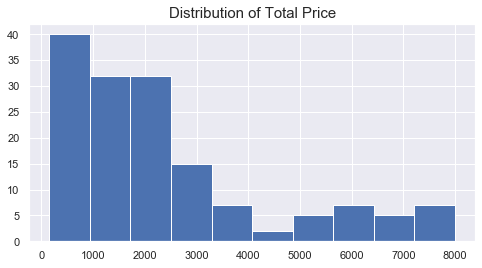

In [12]:
# Display summary statistics of the 'Total Price' column
print("Summary stats of Total Price:")
display(data[['Total Price']].describe())

# Create a histogram to visualize the distribution of 'Total Price' values less than or equal to 8000
plt.figure(figsize=(8,4))
plt.hist(data[data['Total Price']<=8000]['Total Price'], density=False)
plt.title("Distribution of Total Price", size=15)
plt.show()


## Multivariate Analysis:

([Contents:](#Contents:))

Multivariate analysis helps us to understand how two or more columns are related to each other and its relationship with the target variable.

Based on the initial understanding of the different columns in the data (univariate analysis), we can create some hypothesis (if any) or try to ask more complex questions such as:
* How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?
* Which is the most purchased Category/Sub-category?
* Do people add the products to cart before they purchase or buy directly?
* What is the average time taken by a user to buy a product? 
* What is the average time between repeat purchase?
* What is the trend of unique users across the time period?
* What is the trend of purchase across the time period?

This is not the exhaustive list but good to start with.

#### How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?

([Contents:](#Contents:))

In [13]:
# Calculate the total number of unique customers
total_users = data.User_id.nunique()
print(f"Total customers: {total_users}")

# Calculate the number of customers who made at least one purchase
atleast_one_purchase_cust = data[data['Action']=='purchase']['User_id'].nunique()
conversion = 100 * round(atleast_one_purchase_cust / total_users, 2)
print(f"Customers who made at least 1 purchase: {atleast_one_purchase_cust} ({conversion}% conversion)")

# Calculate and display the average number of purchases per customer
purch_dist_by_cust = (data[data['Action']=='purchase'].groupby('User_id').agg({'SubCategory': 'count'})
                      .reset_index().sort_values(by='SubCategory',ascending=False)
                     )
purch_dist_by_cust.rename(columns={'SubCategory':'no_of_purchase'}, inplace=True)
average_purchases = round(purch_dist_by_cust.no_of_purchase.mean(), 2)
print(f"Average number of purchase per customer: {average_purchases}")

# Display the distribution of the number of purchases
print("\nDistribution of Number of Purchases:")
display(purch_dist_by_cust[['no_of_purchase']].describe())


Total customers: 401
Customers who made atleast 1 purchase: 167 (42.0% conversion)
Average number of purchase per customer: 1.2

Distribution of Number of Purchases:


,no_of_purchase
count,167.000000
mean,1.203593
std,0.432685
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


#### Which is the most purchased Category/Sub-category?

([Contents:](#Contents:))

Total Unique Categories: 105


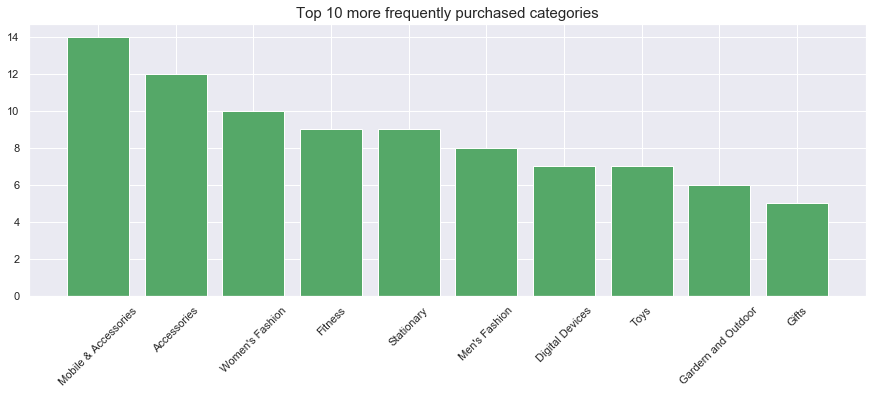

Total Unique SubCategory: 364


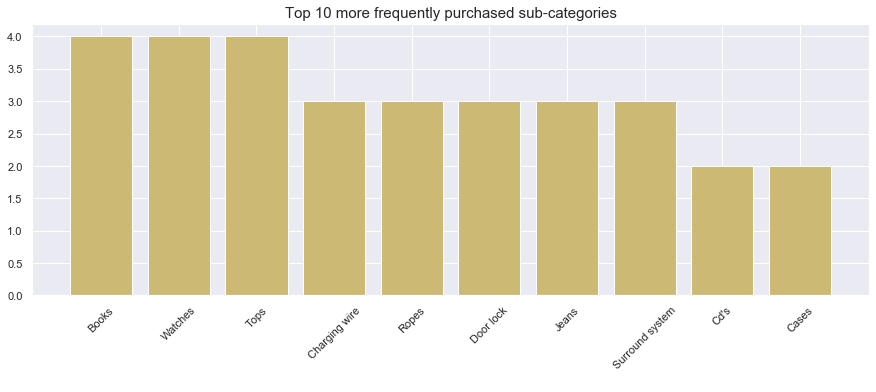

In [14]:
# Calculate and display the top 10 purchased categories
print("Total Unique Categories: " + str(data.Category.nunique()))
temp_category = data[data['Action']=='purchase'].groupby('Category')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.User_id, color='g')
plt.title("Top 10 more frequently purchased categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

# Calculate and display the top 10 purchased subcategories
print("Total Unique SubCategory: " + str(data.SubCategory.nunique()))
temp_subcategory = data[data['Action']=='purchase'].groupby('SubCategory')['User_id'].count().sort values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.User_id, color='y')
plt.title("Top 10 more frequently purchased sub-categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()


#### Do people add the products to cart before they purchase or buy directly?

([Contents:](#Contents:))

In [15]:
# Calculate the number of users who purchased and the number of users who added items to the cart
purchase_users = data[data['Action']=='purchase'].groupby('User_id')['Action'].count().reset_index()
cart_users = data[data['Action']=='add_to_cart'].groupby('User_id')['Action'].count().reset_index()

# Find users who made a direct purchase without adding to the cart
temp = pd.merge(purchase_users, cart_users, on='User_id', how='left', indicator=True)
direct_buy = temp[temp['_merge']=='left_only'].shape[0]

# Find users who added items to the cart but did not make a purchase
temp = pd.merge(cart_users, purchase_users, on='User_id', how='left', indicator=True)
cart_only = temp[temp['_merge']=='left_only'].shape[0]

# Print the results
print("Total unique users who purchased: " + str(purchase_users.shape[0]))
print("Total direct buy (without adding to cart): " + str(direct_buy))
print("Total add_to_cart buy: " + str(cart_users.shape[0] - cart_only))

print("\nTotal unique users who added to cart: " + str(cart_users.shape[0]))
print("Total cart only users (no purchase): " + str(cart_only))


Total unique users who purchased: 167
Total direct buy (without adding to cart): 20
Total add_to_cart buy: 147

Total unique users who added to cart: 240
Total cart only users (no purchase): 93


#### What is the average time taken by a user to buy a product?

([Contents:](#Contents:))

In [17]:
print(purch_dist_by_cust.shape)
purch_dist_by_cust.head()

(167, 2)


,User_id,no_of_purchase
165,60238282834,3
17,51565158157,3
0,51448162784,2
108,53966220604,2
34,51725305614,2



Summary stats (Time diff in days):


,avg_time_diff_days
count,2090.000000
mean,58.562679
std,94.365687
min,0.000000
25%,0.000000
50%,0.000000
75%,105.000000
max,335.000000


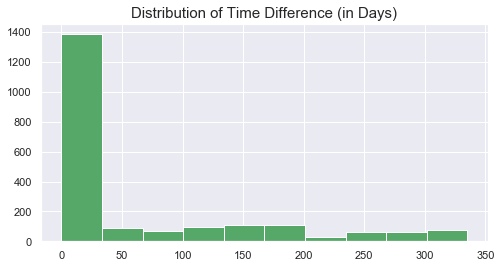


Summary stats (Time diff in minutes):


,avg_time_diff_minutes
count,2090.000000
mean,231.705742
std,394.751734
min,0.000000
25%,14.000000
50%,30.000000
75%,242.000000
max,1404.000000


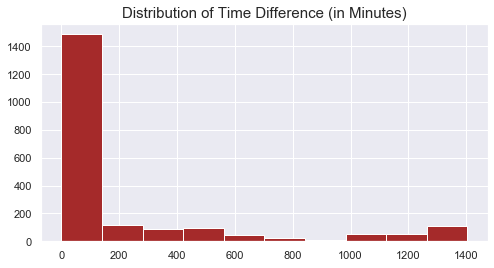

In [18]:
# Create a copy of the data and fill missing purchase counts with 0
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
# temp = temp[temp['no_of_purchase'] == 1].reset_index(drop=True)
# print("Total users who made exactly 1 purchase: " +str(temp.User_id.nunique()))

# Calculate the minimum and maximum purchase times for each user
temp['min_time'] = temp.groupby('User_id')['DateTime'].transform(min)
temp['max_purchase_time'] = temp.groupby('User_id')['DateTime'].transform(max)

# Calculate the average time difference in days and minutes between purchases
temp['avg_time_diff_days'] = (temp['max_purchase_time'] - temp['min_time']).dt.days
temp['avg_time_diff_minutes'] = (temp['max_purchase_time'] - temp['min_time']).dt.seconds / 60

# Display summary statistics for time differences in days
print("\nSummary stats (Time diff in days):")
display(temp[['avg_time_diff_days']].describe())

# Create a histogram to visualize the distribution of time differences in days
plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_days'], density=False, color='g')
plt.title("Distribution of Time Difference (in Days)", size=15)
plt.show()

# Display summary statistics for time differences in minutes
print("\nSummary stats (Time diff in minutes):")
display(temp[['avg_time_diff_minutes']].describe())

# Create a histogram to visualize the distribution of time differences in minutes
plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_minutes'], density=False, color='brown')
plt.title("Distribution of Time Difference (in Minutes)", size=15)
plt.show()




#### What is the average time between repeat purchase?

([Contents:](#Contents:))

Total users who made more than 1 purchase: 32

Summary stats (Time diff in days):


,diff
count,32.00000
mean,101.03125
std,76.81628
min,0.00000
25%,35.25000
50%,90.50000
75%,177.25000
max,245.00000


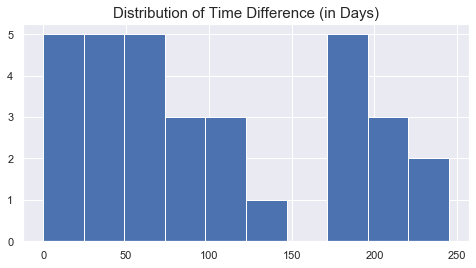

In [19]:
# Create a copy of the data and fill missing purchase counts with 0
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
temp = temp[temp['no_of_purchase'] > 1].reset_index(drop=True)
print("Total users who made more than 1 purchase: " + str(temp.User_id.nunique()))

# Define a function to calculate the time difference between repeat purchases
def purch_time_diff(x):
    if len(x) == 2:
        return (x[1] - x[0]).days

    if len(x) == 3:
        diff_12 = (x[1] - x[0]).days
        diff_23 = (x[2] - x[1]).days
        return (diff_12 + diff_23) / 2

# Sort and group the purchase data by user and calculate the time differences
test = temp[temp['Action'] == 'purchase'].sort_values(by=['User_id', 'DateTime'])
test = test.groupby('User_id').agg({'DateTime': lambda x: list(x)})
test['diff'] = test['DateTime'].apply(purch_time_diff)
test = test.reset_index()

# Display summary statistics for time differences in days
print("\nSummary stats (Time diff in days):")
display(test[['diff']].describe())

# Create a histogram to visualize the distribution of time differences in days
plt.figure(figsize=(8,4))
plt.hist(test['diff'], density=False, color='b')
plt.title("Distribution of Time Difference (in Days)", size=15)
plt.show()


In [24]:
test.sample(5)

,User_id,DateTime,diff
22,54447852002,"[2019-06-28 18:40:00, 2019-10-11 22:33:00]",105.0
17,51969791374,"[2019-08-19 18:36:00, 2019-10-26 14:40:00]",67.0
30,60238282834,"[2019-07-21 14:46:00, 2019-12-09 11:45:00, 201...",71.0
10,51592642763,"[2019-03-11 13:49:00, 2019-04-30 13:02:00]",49.0
20,53649822812,"[2019-05-08 13:48:00, 2019-11-14 11:07:00]",189.0


#### What is the trend of unique users across time period?

([Contents:](#Contents:))

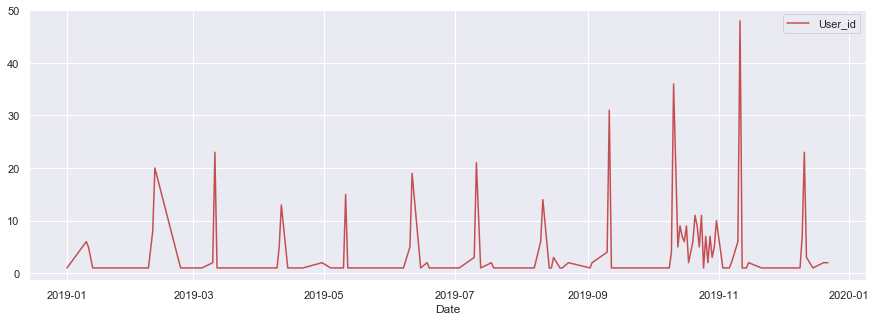

In [25]:
# Create a copy of the data and extract the date from the DateTime column
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date

# Group the data by Date and count the number of unique User_ids for each date
temp = temp.groupby('Date').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Date')

# Set the Date column as the index and plot the distribution of unique users over time
temp.set_index('Date').plot(figsize=(15,5), color='r')
plt.show()


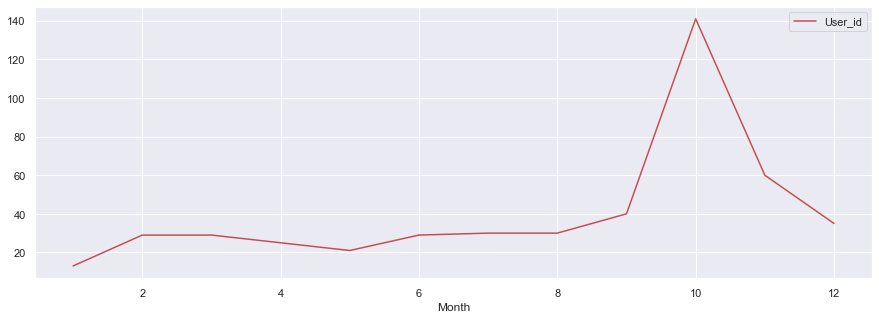

In [26]:
# Create a copy of the data and extract the date and month from the DateTime column
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month

# Group the data by Month and count the number of unique User_ids for each month
temp = temp.groupby('Month').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Month')

# Set the Month column as the index and plot the distribution of unique users across months
temp.set_index('Month').plot(figsize=(15,5), color='r')
plt.show()


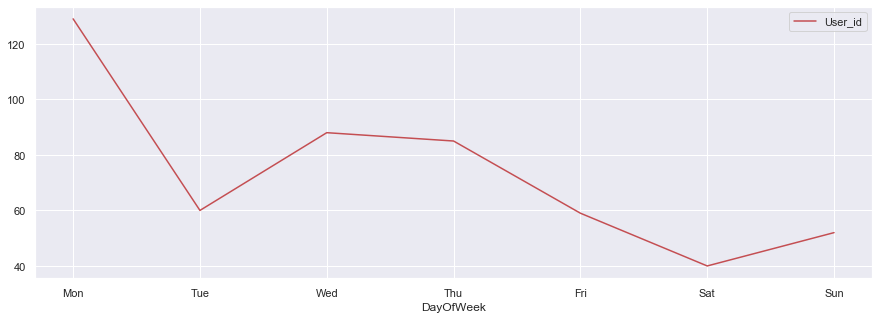

In [27]:
# Create a copy of the data and extract the date, month, and day of the week from the DateTime column
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek

# Group the data by DayOfWeek (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) and count the number of unique User_ids for each day of the week
temp = temp.groupby('DayOfWeek').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfWeek')

# Set the DayOfWeek column as the index, and plot the distribution of unique users across weekdays, customizing the x-axis labels
temp.set_index('DayOfWeek').plot(figsize=(15,5), color='r')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()


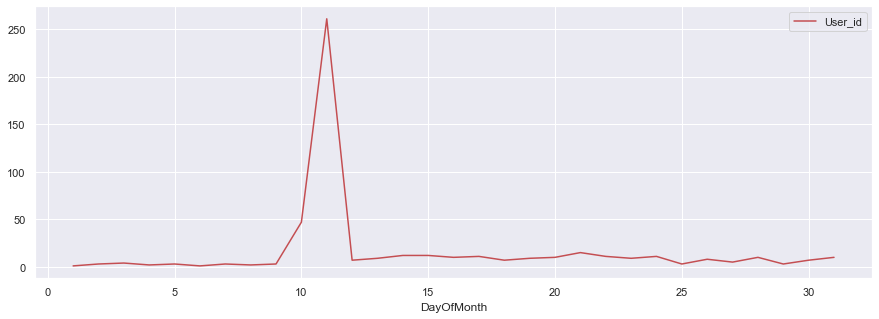

In [28]:
# Create a copy of the data and extract the date, month, day of the week, and day of the month from the DateTime column
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp['DayOfMonth'] = temp['DateTime'].dt.day

# Group the data by DayOfMonth (day of the month) and count the number of unique User_ids for each day
temp = temp.groupby('DayOfMonth').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfMonth')

# Set the DayOfMonth column as the index and plot the distribution of unique users across the days of the month
temp.set_index('DayOfMonth').plot(figsize=(15,5), color='r')
plt.show()


#### What is the trend of purchase across the time period?

([Contents:](#Contents:))

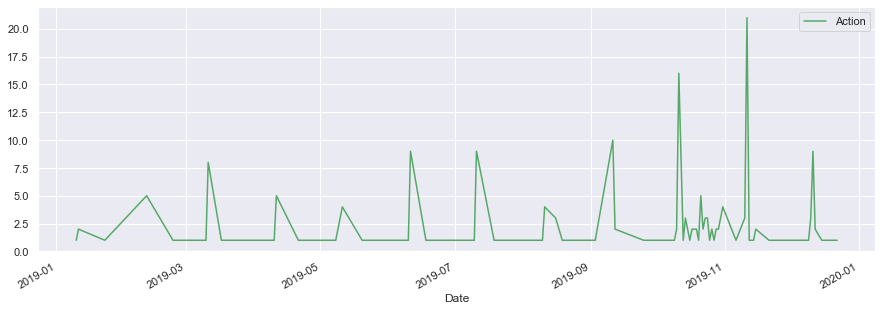

In [29]:
# Create a copy of the 'data' DataFrame
temp = data.copy()

# Extract the date from the 'DateTime' column
temp['Date'] = temp['DateTime'].dt.date
temp['Date'] = pd.to_datetime(temp['Date'])

# Extract the month and day of the week from the 'DateTime' column
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek

# Filter rows with 'Action' equal to 'purchase', group by date, and count the occurrences
temp = temp[temp['Action']=='purchase'].groupby('Date').agg({'Action': 'count'}).reset_index().sort_values(by='Date')
# display(temp.head())
# print(temp.Action.sum())

# Plot the distribution of purchases over time
temp.set_index('Date').plot(figsize=(15,5), color='g')
plt.show()


---